In [1]:
import numpy as np
import pandas as pd
from IPython.display import display

import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import cycler
import matplotlib as ml
from matplotlib import ticker
import matplotlib.ticker as mtick

style.use("seaborn-v0_8-ticks")

# Grid
ml.rcParams["axes.grid"]=True
ml.rcParams["axes.grid.axis"]="x"
ml.rcParams["grid.linestyle"]='-'
ml.rcParams["grid.linewidth"]=0.5

# Border style
ml.rcParams["axes.spines.right"]=False
ml.rcParams["axes.spines.top"]=False
ml.rcParams["axes.spines.left"]=False
ml.rcParams["axes.spines.bottom"]=True
ml.rcParams["axes.linewidth"]=0.8
ml.rcParams["axes.edgecolor"]="#ddd"

# tick
ml.rcParams["xtick.bottom"]=False
ml.rcParams["xtick.labelsize"]="large"
ml.rcParams["ytick.left"]=False

# font
ml.rcParams["font.sans-serif"]="Times New Roman"
ml.rcParams["font.size"]=10

# legend
ml.rcParams["legend.handlelength"]=.7
ml.rcParams["legend.handleheight"]=.8
ml.rcParams["legend.labelspacing"]=.0
ml.rcParams["legend.borderpad"]=.0
ml.rcParams["legend.fontsize"]="large"
ml.rcParams["legend.loc"]="upper center"
ml.rcParams["legend.borderaxespad"]=.0
ml.rcParams["legend.handletextpad"]=.2
ml.rcParams["legend.columnspacing"]=1.

# color params
ml.rcParams["patch.facecolor"]='#92C6FF'
# color style of pastel:
# ml.rcParams["axes.prop_cycle"]=cycler('color', ['#92C6FF', '#97F0AA', '#FF9F9A', '#D0BBFF', '#FFFEA3', '#B0E0E6'])
# color style of IEEE example:
ml.rcParams["axes.prop_cycle"]=cycler('color', ['#4472C4','#ED7D31','#A5A5A5','#FFC000','#5B9BD5'])

In [2]:
def show_fig(res,ncol=3):

       fig,ax=plt.subplots(figsize=(6,3),dpi=1000)
       res[['auc', 'accuracy', 'precision', 'sensitivity', 'f1', 'NEWR', 'CWR']].T.plot.bar(ax=ax)

       plt.xticks(range(0,7),['AUC', 'ACC', 'Precision', 'Recall', 'F1', 'NEWR', 'CWR'],rotation=0)
       ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
       # ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
       plt.legend(
              bbox_to_anchor=(0.48,-0.15),
              ncol=ncol,
       )
       plt.ylim(0.5,1)
       plt.grid(axis="x")
       plt.show()

In [3]:
result = pd.read_csv("result.csv")
result["test_volunteers"]=result["test_volunteers"].apply(eval)
result["train_volunteers"]=result["train_volunteers"].apply(eval)
result["test_num"]=result["test_volunteers"].apply(len)
result["train_num"]=result["train_volunteers"].apply(len)
result['time']=pd.to_datetime(result['time'])
result

,time,filter,preprocess,model,epoch,test_volunteers,train_volunteers,auc,accuracy,precision,sensitivity,specificity,f1,group,sample,misinformation,missing_group,misinformation_group,test_num,train_num
0,2022-10-22 01:24:00,butterworth0.1,cv20,CNN,100,"[20, 9, 11, 18, 7, 14, 5, 3, 6, 15, 10, 8, 17,...","[19, 2]",0.99976,0.99371,0.99700,0.88013,0.99986,0.93493,216,31356,0,12,0,18,2
1,2022-10-22 01:50:00,butterworth0.1,cv20,CNN,100,"[11, 18, 7, 14, 5, 3, 6, 15, 10, 8, 17, 12, 4,...","[20, 9]",0.99970,0.99571,0.99065,0.92416,0.99953,0.95625,216,31331,4,9,2,18,2
2,2022-10-22 02:16:00,butterworth0.1,cv20,CNN,100,"[7, 14, 5, 3, 6, 15, 10, 8, 17, 12, 4, 1, 16, ...","[11, 18]",0.99921,0.98539,0.99533,0.71544,0.99982,0.83249,216,31301,7,26,2,18,2
3,2022-10-22 02:42:00,butterworth0.1,cv20,CNN,100,"[5, 3, 6, 15, 10, 8, 17, 12, 4, 1, 16, 13, 19,...","[7, 14]",0.99989,0.99639,0.99641,0.93217,0.99982,0.96322,216,31320,0,5,0,18,2
4,2022-10-22 03:08:00,butterworth0.1,cv20,CNN,100,"[6, 15, 10, 8, 17, 12, 4, 1, 16, 13, 19, 2, 20...","[5, 3]",0.99918,0.98800,0.98618,0.78258,0.99939,0.87266,216,31351,1,19,1,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,2023-01-11 20:31:44,butterworth0.2,3x3cv20,CNN,100,"[10, 8, 17, 12, 4, 1, 16, 13, 19, 2, 20, 9, 11...","[6, 15]",0.99980,0.99715,0.98189,0.96252,0.99903,0.97211,216,31351,4,0,3,18,2
318,2023-01-11 20:51:19,butterworth0.2,3x3cv20,CNN,100,"[17, 12, 4, 1, 16, 13, 19, 2, 20, 9, 11, 18, 7...","[10, 8]",0.99949,0.99523,0.94726,0.95878,0.99717,0.95299,216,31349,55,0,14,18,2
319,2023-01-11 21:11:06,butterworth0.2,3x3cv20,CNN,100,"[4, 1, 16, 13, 19, 2, 20, 9, 11, 18, 7, 14, 5,...","[17, 12]",0.99925,0.99557,0.98711,0.92483,0.99935,0.95495,216,31298,16,2,7,18,2
320,2023-01-11 21:31:13,butterworth0.2,3x3cv20,CNN,100,"[16, 13, 19, 2, 20, 9, 11, 18, 7, 14, 5, 3, 6,...","[4, 1]",0.99969,0.99589,0.99088,0.92895,0.99953,0.95891,216,31309,3,3,2,18,2


In [4]:
rg=result.groupby(["preprocess","model","filter","train_num","epoch","group"])
rm=rg.mean().reset_index()
rc=rg['train_volunteers'].count().reset_index(drop=True)
rc.name='count'
rt=rg['time'].mean()
result_grouped=pd.concat((rc,rm),axis=1)
result_grouped

C:\Users\Administrator\AppData\Local\Temp\ipykernel_70416\3519779551.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rm=rg.mean().reset_index()


,count,preprocess,model,filter,train_num,epoch,group,auc,accuracy,precision,sensitivity,specificity,f1,sample,misinformation,missing_group,misinformation_group,test_num
0,10,3x3cv20,CNN,butterworth0.2,2,100,216,0.999493,0.995044,0.984623,0.917753,0.999199,0.948610,31329.9,13.20,3.80,4.5,18.0
1,2,3x3cv20,CNN,butterworth0.2,10,100,120,0.999410,0.999145,1.000000,0.983330,1.000000,0.991585,17405.5,0.00,0.50,0.0,10.0
2,10,3x3cv20,CNN,butterworth0.2,18,100,24,0.999409,0.998927,0.999448,0.978925,0.999968,0.988927,3481.1,0.00,0.20,0.0,2.0
3,10,cv10,CNN,butterworth0.2,2,100,216,0.998166,0.993410,0.914551,0.967297,0.994810,0.938728,31329.9,116.90,2.60,20.0,18.0
4,2,cv10,CNN,butterworth0.2,10,100,120,0.999995,0.999600,0.995800,0.996425,0.999775,0.996115,17405.5,2.00,0.00,1.5,10.0
5,10,cv10,CNN,butterworth0.2,18,100,24,0.999967,0.999417,0.996018,0.992264,0.999805,0.994092,3481.1,0.50,0.10,0.5,2.0
6,10,cv20,CNN,butterworth0.1,2,100,216,0.998962,0.991138,0.981859,0.843430,0.999113,0.905548,31329.9,20.00,11.80,4.0,18.0
7,2,cv20,CNN,butterworth0.1,10,100,120,0.999385,0.996120,0.999390,0.925695,0.999970,0.959805,17405.5,0.00,5.00,0.0,10.0
8,10,cv20,CNN,butterworth0.1,18,100,24,0.999439,0.998251,0.999338,0.965798,0.999968,0.982054,3481.1,0.10,0.50,0.1,2.0
9,10,cv20,CNN,butterworth0.2,2,100,216,0.999035,0.993550,0.943657,0.933376,0.996790,0.936965,31329.9,51.90,5.40,9.8,18.0


In [5]:
result_grouped["NEWR"]=1-result_grouped["misinformation_group"]/result_grouped["group"]
result_grouped["CWR"]=1-result_grouped["missing_group"]/result_grouped["group"]
result_grouped

,count,preprocess,model,filter,train_num,epoch,group,auc,accuracy,precision,sensitivity,specificity,f1,sample,misinformation,missing_group,misinformation_group,test_num,NEWR,CWR
0,10,3x3cv20,CNN,butterworth0.2,2,100,216,0.999493,0.995044,0.984623,0.917753,0.999199,0.948610,31329.9,13.20,3.80,4.5,18.0,0.979167,0.982407
1,2,3x3cv20,CNN,butterworth0.2,10,100,120,0.999410,0.999145,1.000000,0.983330,1.000000,0.991585,17405.5,0.00,0.50,0.0,10.0,1.000000,0.995833
2,10,3x3cv20,CNN,butterworth0.2,18,100,24,0.999409,0.998927,0.999448,0.978925,0.999968,0.988927,3481.1,0.00,0.20,0.0,2.0,1.000000,0.991667
3,10,cv10,CNN,butterworth0.2,2,100,216,0.998166,0.993410,0.914551,0.967297,0.994810,0.938728,31329.9,116.90,2.60,20.0,18.0,0.907407,0.987963
4,2,cv10,CNN,butterworth0.2,10,100,120,0.999995,0.999600,0.995800,0.996425,0.999775,0.996115,17405.5,2.00,0.00,1.5,10.0,0.987500,1.000000
5,10,cv10,CNN,butterworth0.2,18,100,24,0.999967,0.999417,0.996018,0.992264,0.999805,0.994092,3481.1,0.50,0.10,0.5,2.0,0.979167,0.995833
6,10,cv20,CNN,butterworth0.1,2,100,216,0.998962,0.991138,0.981859,0.843430,0.999113,0.905548,31329.9,20.00,11.80,4.0,18.0,0.981481,0.945370
7,2,cv20,CNN,butterworth0.1,10,100,120,0.999385,0.996120,0.999390,0.925695,0.999970,0.959805,17405.5,0.00,5.00,0.0,10.0,1.000000,0.958333
8,10,cv20,CNN,butterworth0.1,18,100,24,0.999439,0.998251,0.999338,0.965798,0.999968,0.982054,3481.1,0.10,0.50,0.1,2.0,0.995833,0.979167
9,10,cv20,CNN,butterworth0.2,2,100,216,0.999035,0.993550,0.943657,0.933376,0.996790,0.936965,31329.9,51.90,5.40,9.8,18.0,0.954630,0.975000


In [6]:
result_grouped=result_grouped.applymap(lambda x: round(x,3) if isinstance(x,float) else x)
result_grouped.T.applymap(lambda x: '%.3f'%x if isinstance(x,float) else x).to_csv("result_grouped.csv")
result_grouped

,count,preprocess,model,filter,train_num,epoch,group,auc,accuracy,precision,sensitivity,specificity,f1,sample,misinformation,missing_group,misinformation_group,test_num,NEWR,CWR
0,10,3x3cv20,CNN,butterworth0.2,2,100,216,0.999,0.995,0.985,0.918,0.999,0.949,31329.9,13.20,3.80,4.5,18.0,0.979,0.982
1,2,3x3cv20,CNN,butterworth0.2,10,100,120,0.999,0.999,1.000,0.983,1.000,0.992,17405.5,0.00,0.50,0.0,10.0,1.000,0.996
2,10,3x3cv20,CNN,butterworth0.2,18,100,24,0.999,0.999,0.999,0.979,1.000,0.989,3481.1,0.00,0.20,0.0,2.0,1.000,0.992
3,10,cv10,CNN,butterworth0.2,2,100,216,0.998,0.993,0.915,0.967,0.995,0.939,31329.9,116.90,2.60,20.0,18.0,0.907,0.988
4,2,cv10,CNN,butterworth0.2,10,100,120,1.000,1.000,0.996,0.996,1.000,0.996,17405.5,2.00,0.00,1.5,10.0,0.988,1.000
5,10,cv10,CNN,butterworth0.2,18,100,24,1.000,0.999,0.996,0.992,1.000,0.994,3481.1,0.50,0.10,0.5,2.0,0.979,0.996
6,10,cv20,CNN,butterworth0.1,2,100,216,0.999,0.991,0.982,0.843,0.999,0.906,31329.9,20.00,11.80,4.0,18.0,0.981,0.945
7,2,cv20,CNN,butterworth0.1,10,100,120,0.999,0.996,0.999,0.926,1.000,0.960,17405.5,0.00,5.00,0.0,10.0,1.000,0.958
8,10,cv20,CNN,butterworth0.1,18,100,24,0.999,0.998,0.999,0.966,1.000,0.982,3481.1,0.10,0.50,0.1,2.0,0.996,0.979
9,10,cv20,CNN,butterworth0.2,2,100,216,0.999,0.994,0.944,0.933,0.997,0.937,31329.9,51.90,5.40,9.8,18.0,0.955,0.975


## Comparison of different training numbers of proposed method

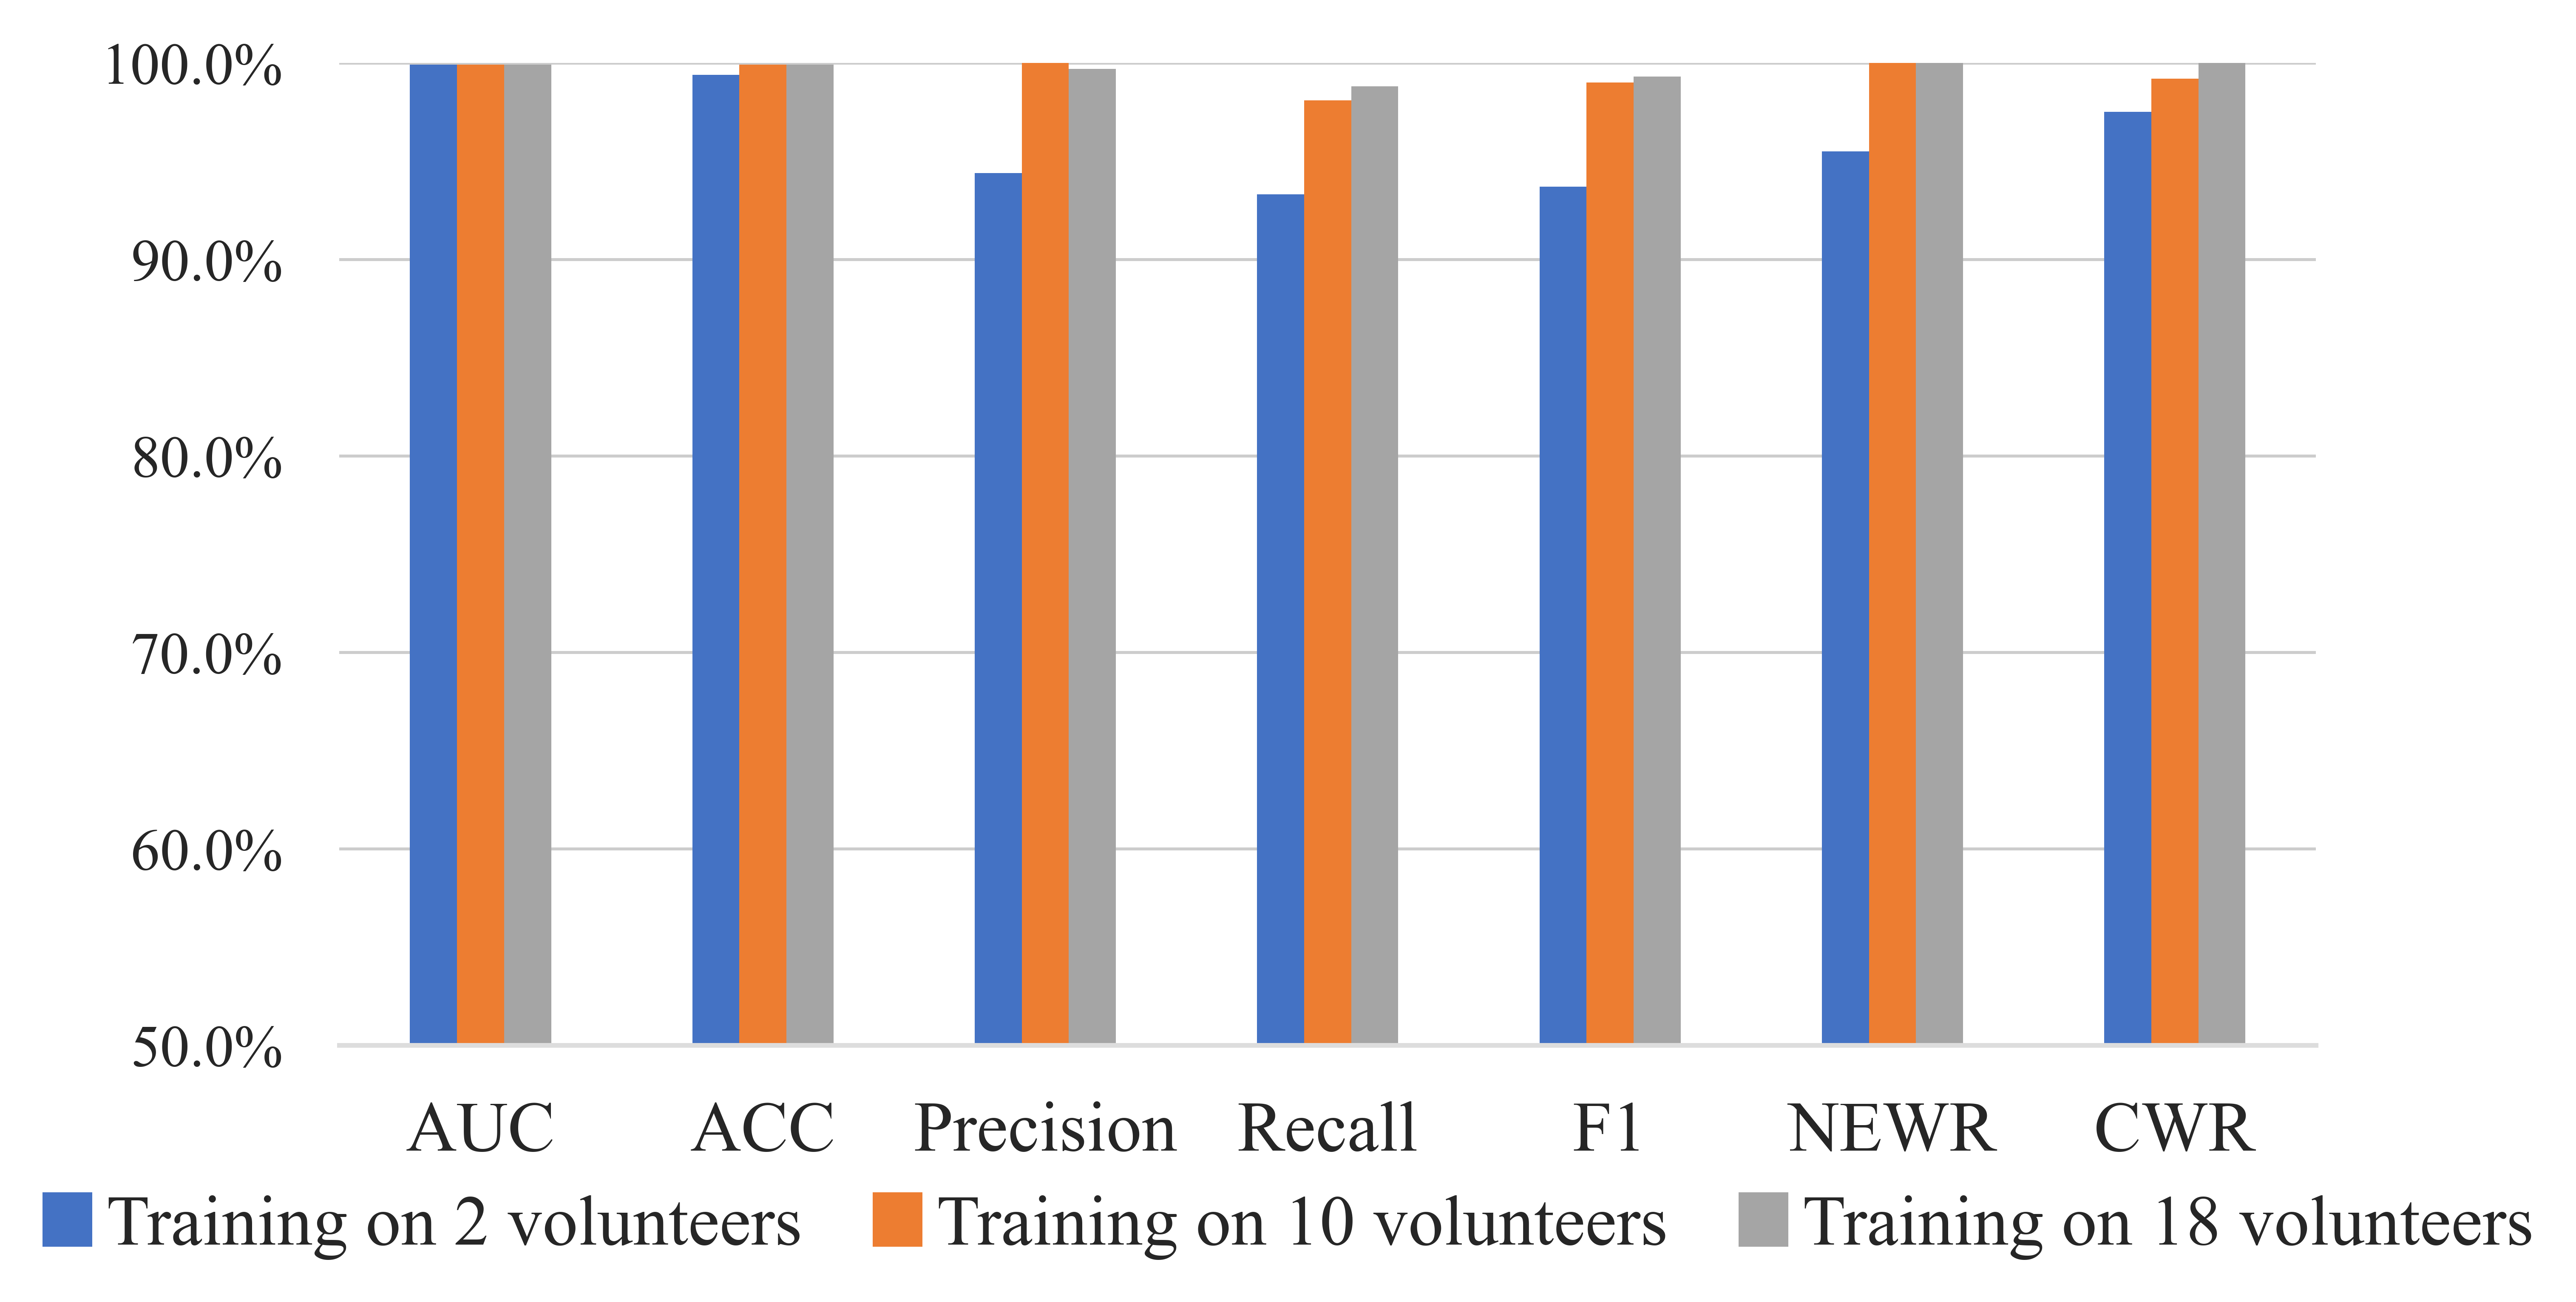

,count,preprocess,model,filter,train_num,epoch,group,auc,accuracy,precision,sensitivity,specificity,f1,sample,misinformation,missing_group,misinformation_group,test_num,NEWR,CWR
Training on 2 volunteers,10,cv20,CNN,butterworth0.2,2,100,216,0.999,0.994,0.944,0.933,0.997,0.937,31329.9,51.9,5.4,9.8,18.0,0.955,0.975
Training on 10 volunteers,2,cv20,CNN,butterworth0.2,10,100,120,0.999,0.999,1.000,0.981,1.000,0.990,17405.5,0.0,1.0,0.0,10.0,1.000,0.992
Training on 18 volunteers,10,cv20,CNN,butterworth0.2,18,100,24,0.999,0.999,0.997,0.988,1.000,0.993,3481.1,0.0,0.0,0.0,2.0,1.000,1.000


In [7]:
# res2=result_grouped.T.loc[['train_num','auc', 'accuracy', 'precision', 'sensitivity', 'specificity',
       # 'f1', 'NEWR', 'CWR'],3:5]
res2=result_grouped[(result_grouped["preprocess"]=="cv20") & (result_grouped["filter"]=="butterworth0.2")].copy()
res2.index=['Training on 2 volunteers','Training on 10 volunteers','Training on 18 volunteers']
show_fig(res2)
res2

## Comparison of different numbers of transmit antennas

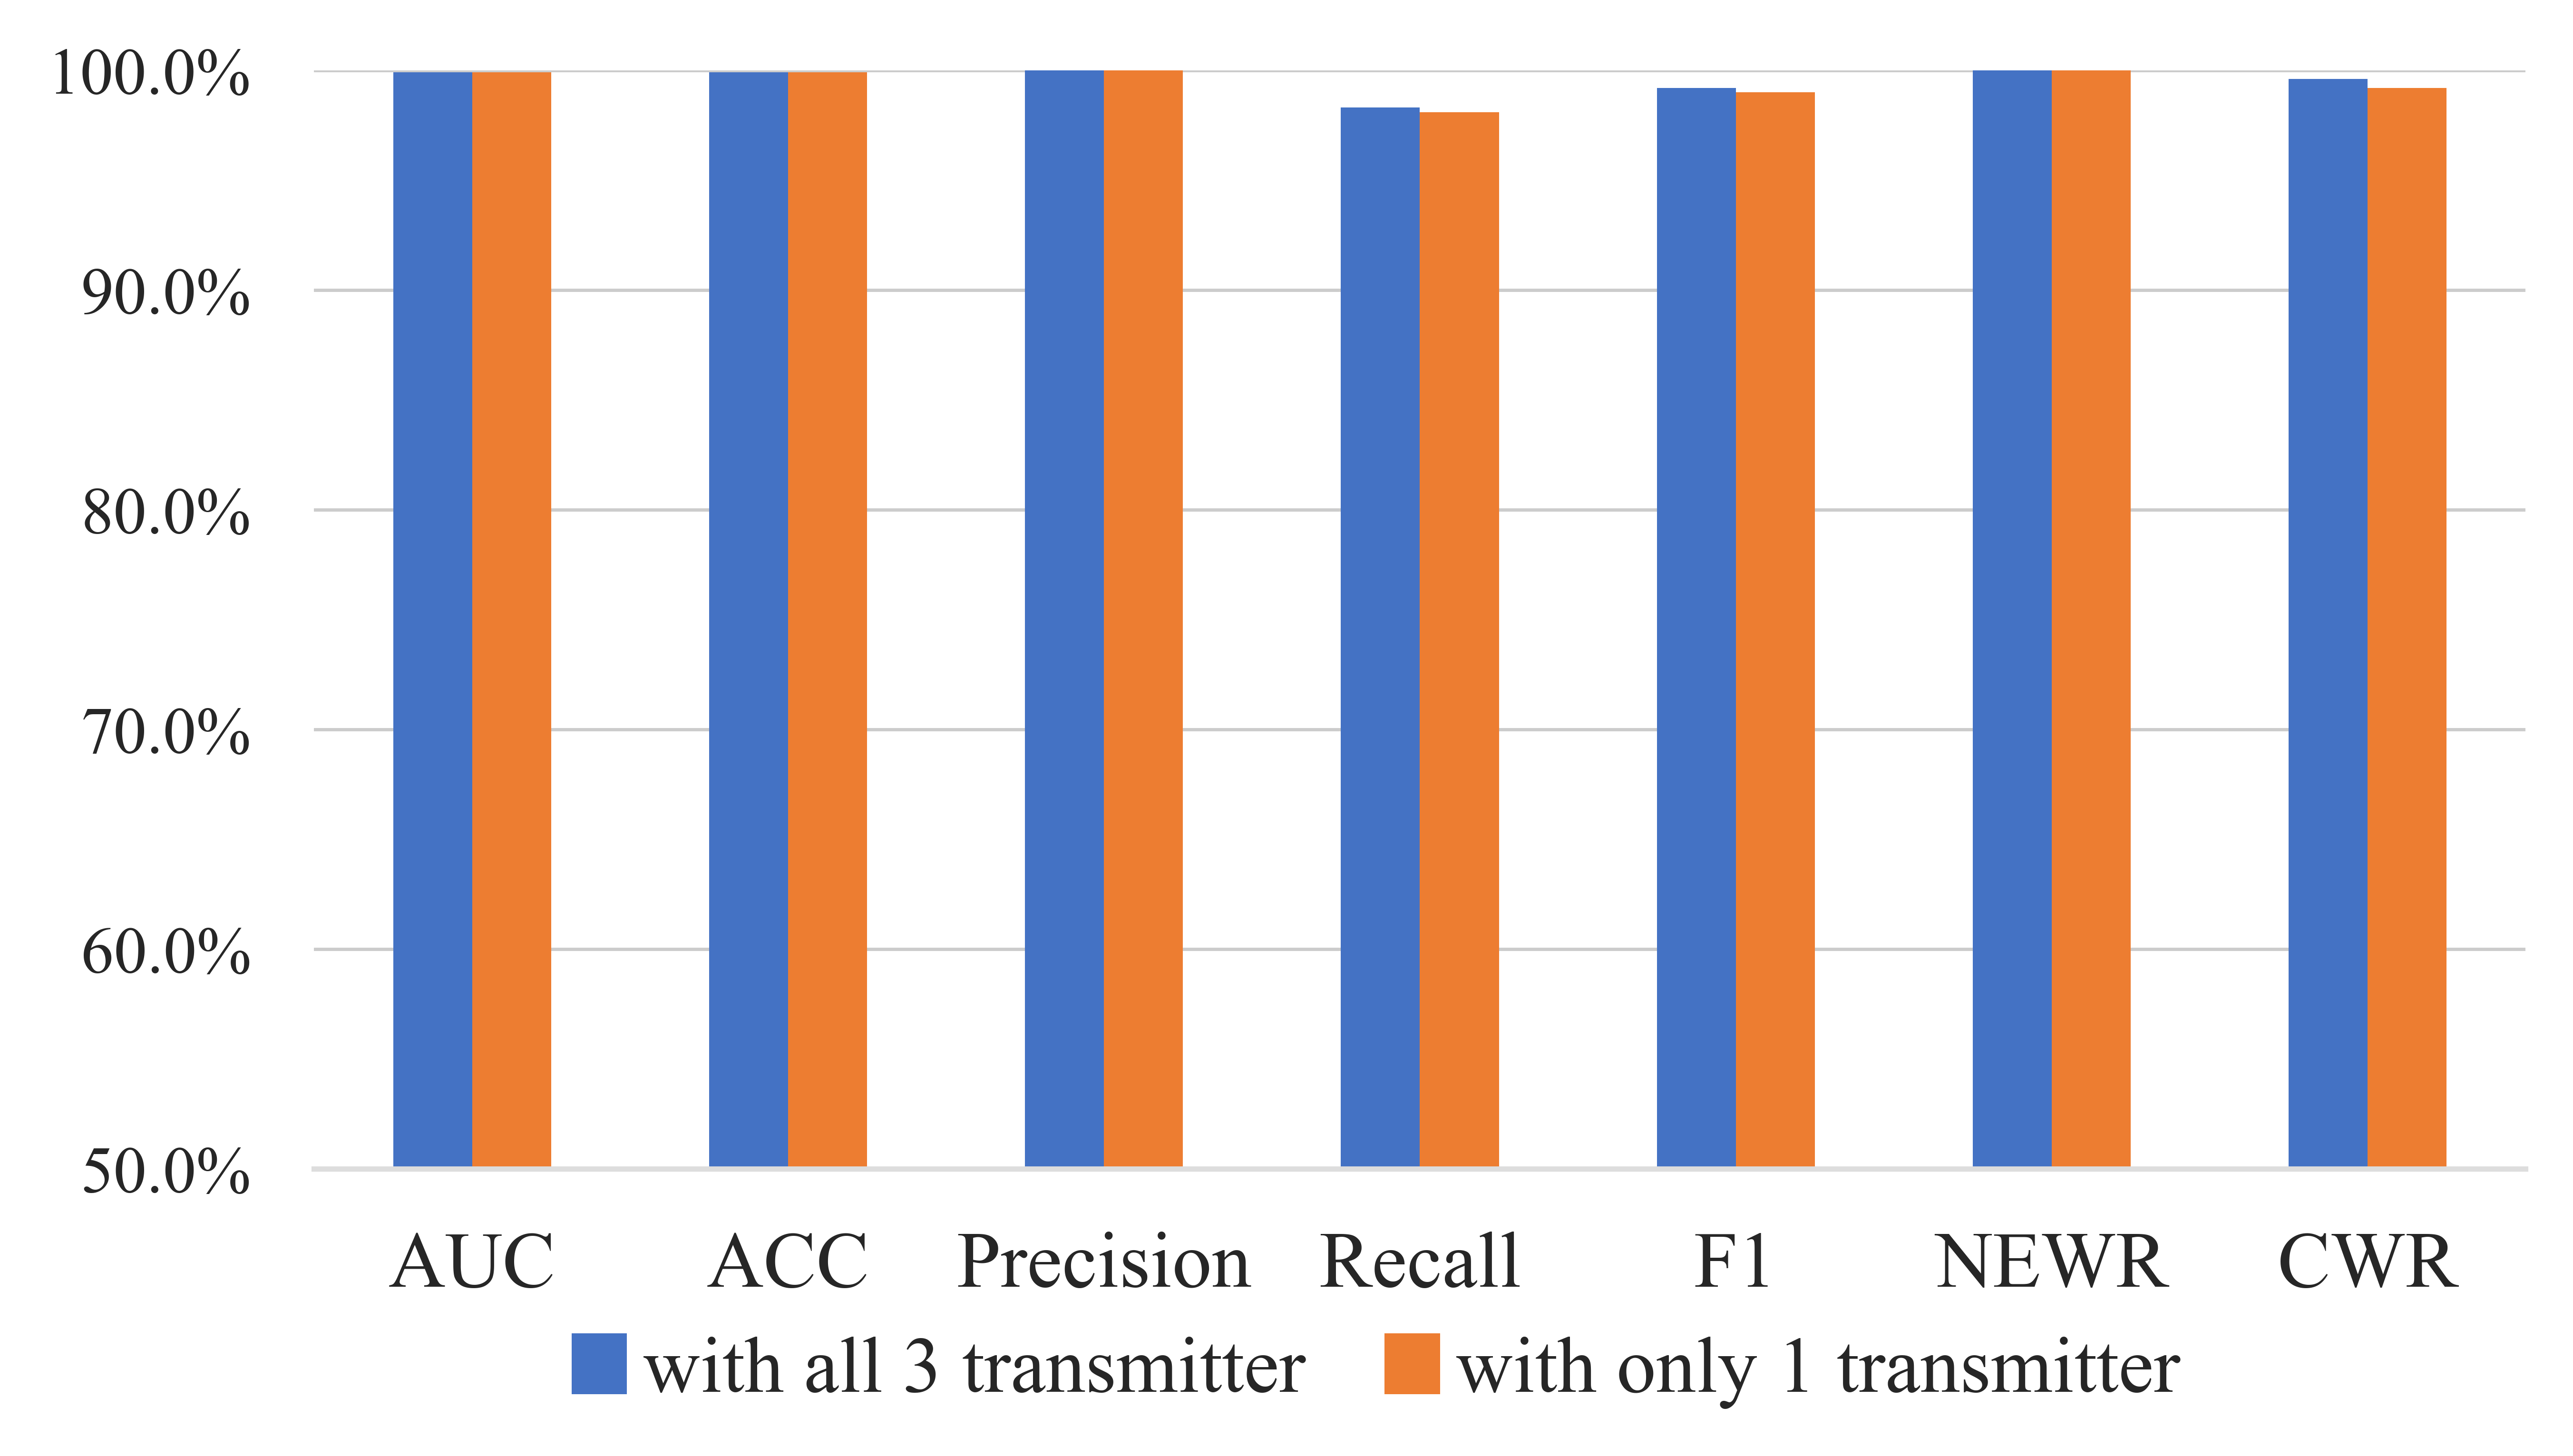

,count,preprocess,model,filter,train_num,epoch,group,auc,accuracy,precision,sensitivity,specificity,f1,sample,misinformation,missing_group,misinformation_group,test_num,NEWR,CWR
with all 3 transmitter,2,3x3cv20,CNN,butterworth0.2,10,100,120,0.999,0.999,1.0,0.983,1.0,0.992,17405.5,0.0,0.5,0.0,10.0,1.0,0.996
with only 1 transmitter,2,cv20,CNN,butterworth0.2,10,100,120,0.999,0.999,1.0,0.981,1.0,0.990,17405.5,0.0,1.0,0.0,10.0,1.0,0.992


In [18]:
train_num=2  # num of volunteers for training
res3=result_grouped[(result_grouped["filter"]=="butterworth0.2")&(result_grouped["preprocess"].isin(['cv20','3x3cv20'])) & (result_grouped["train_num"]==train_num)].copy()

res3.index=['with all 3 transmitter','with only 1 transmitter']
show_fig(res3)
res3

## Comparison between the proposed method and spectrogram image method

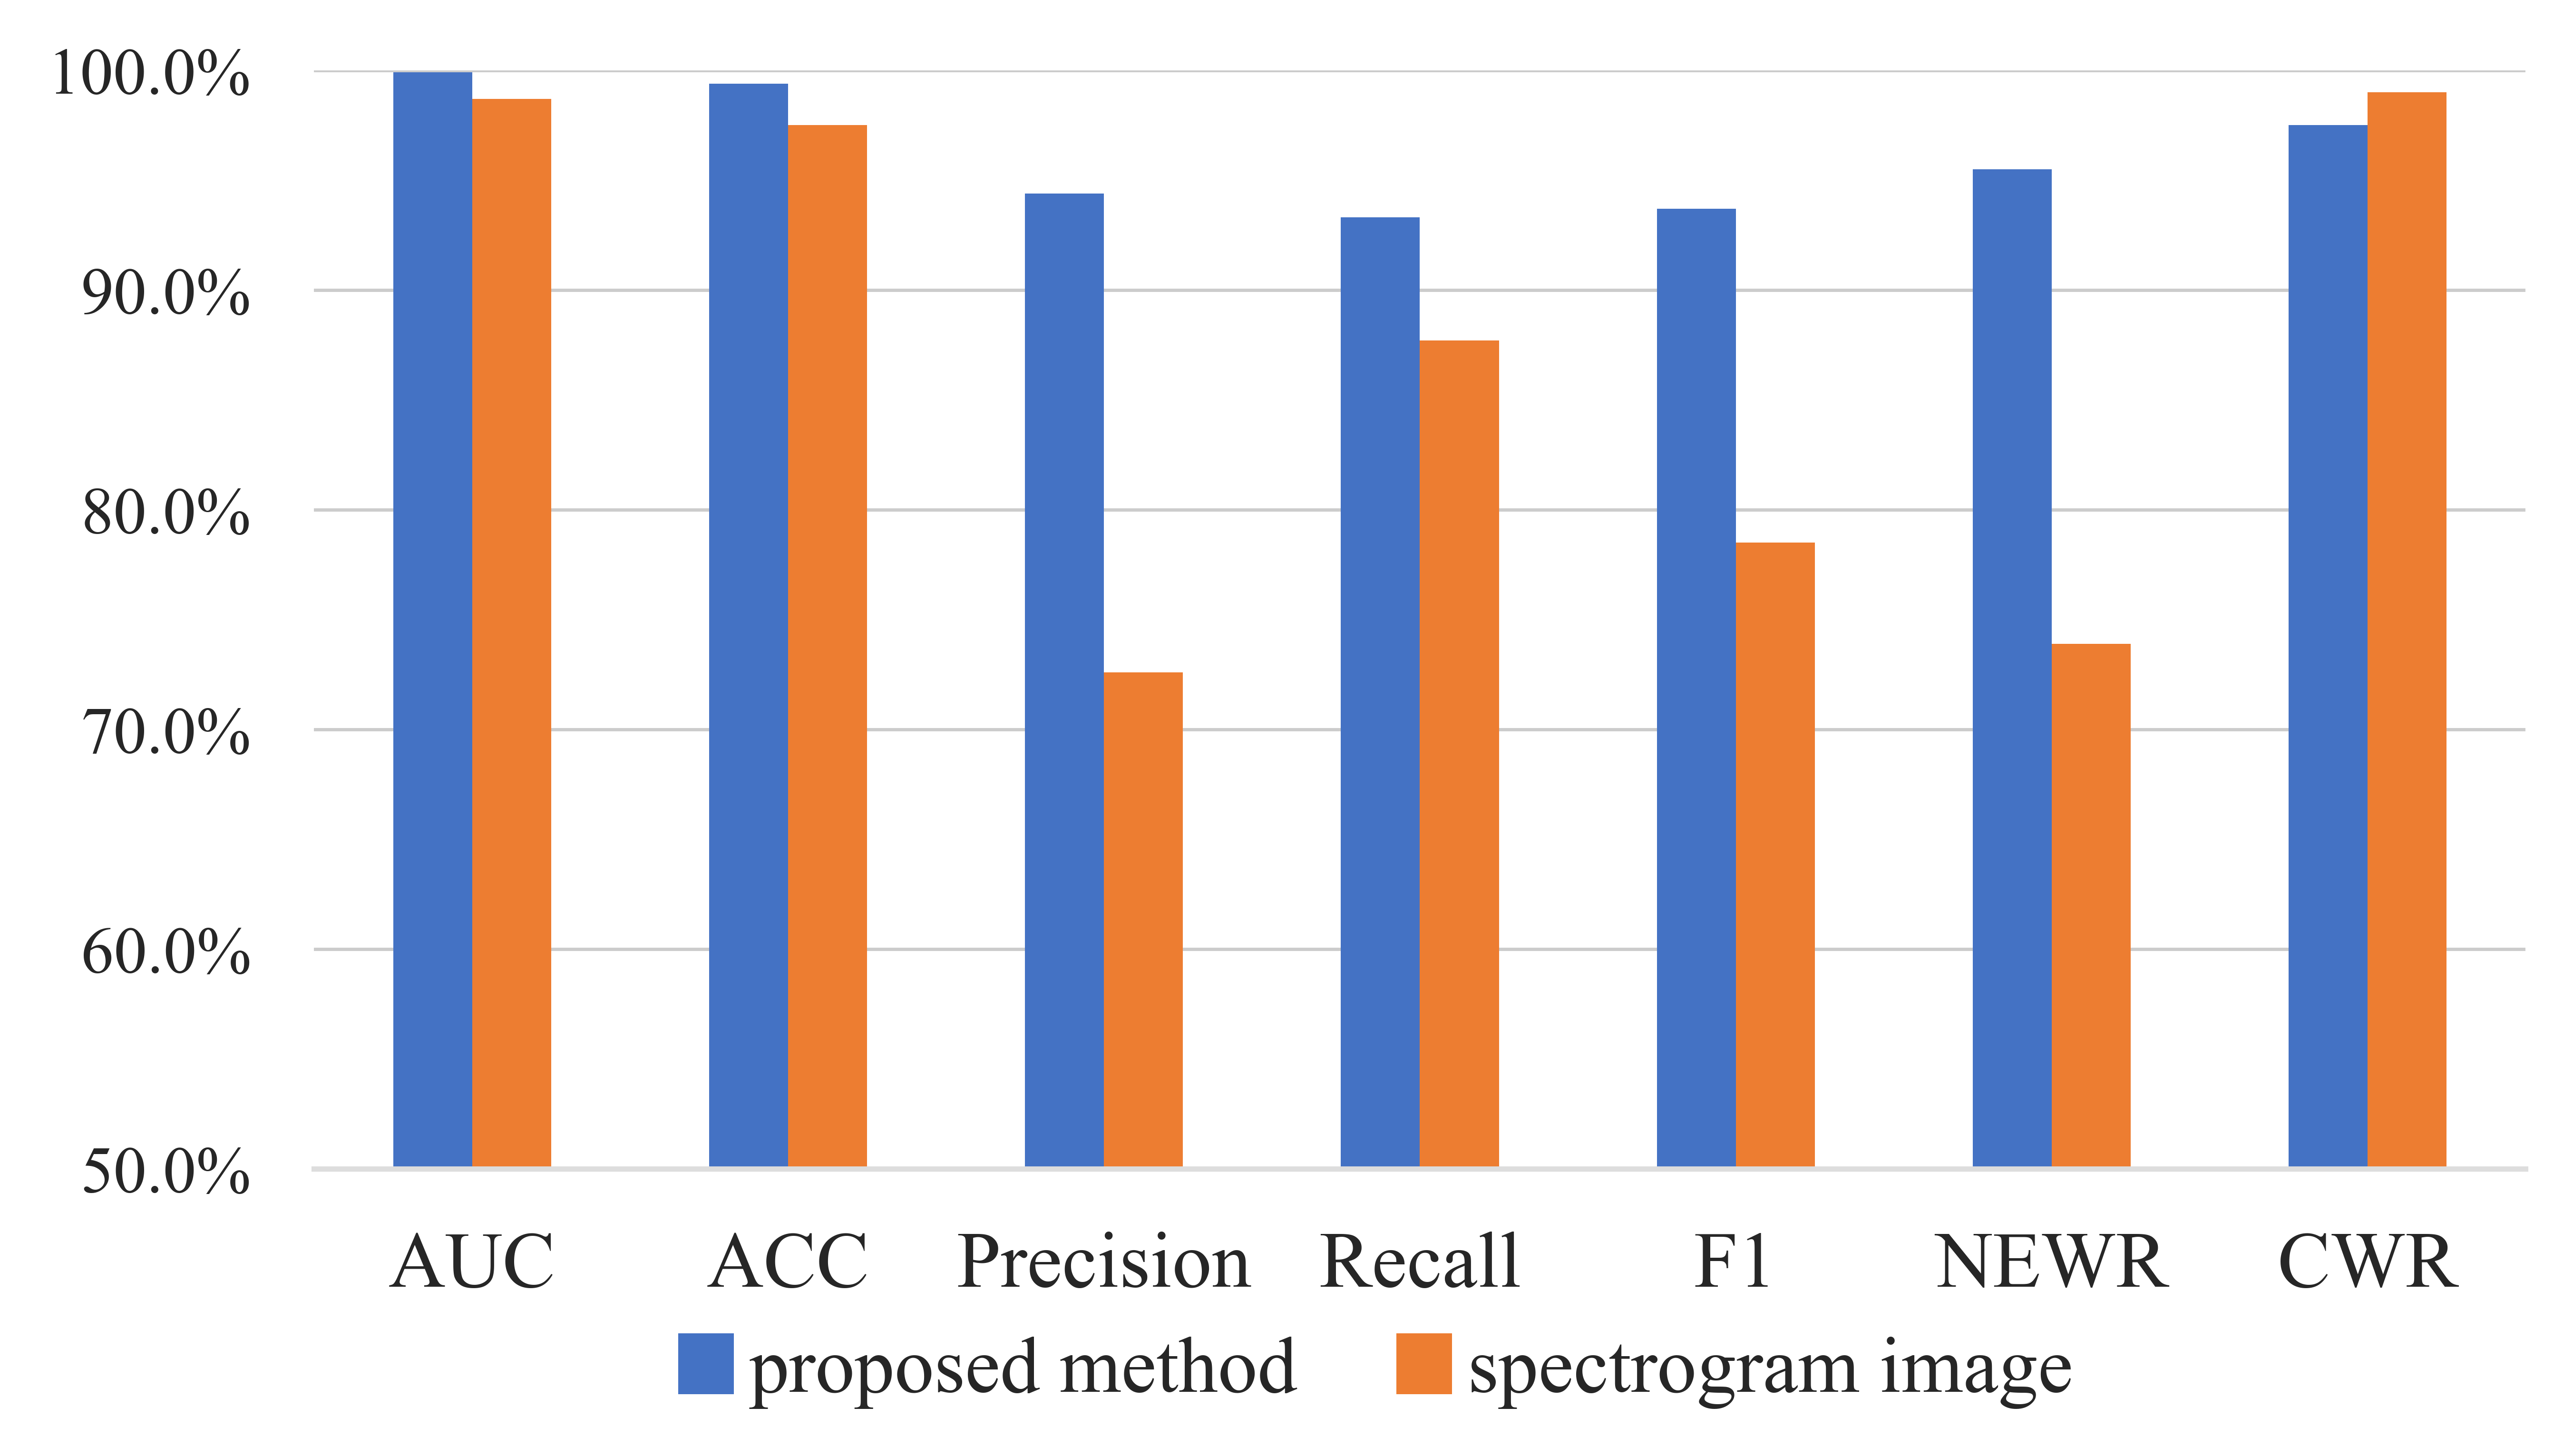

,count,preprocess,model,filter,train_num,epoch,group,auc,accuracy,precision,sensitivity,specificity,f1,sample,misinformation,missing_group,misinformation_group,test_num,NEWR,CWR
proposed method,10,cv20,CNN,butterworth0.2,2,100,216,0.999,0.994,0.944,0.933,0.997,0.937,31329.9,51.9,5.4,9.8,18.0,0.955,0.975
spectrogram image,10,pca_stft,resnet50,butterworth0.2,2,50,216,0.987,0.975,0.726,0.877,0.980,0.785,31329.9,517.6,2.2,56.4,18.0,0.739,0.990


In [12]:
train_num=2  # num of volunteers for training
res3=result_grouped[(result_grouped["filter"]=="butterworth0.2")&(result_grouped["preprocess"].isin(['cv20','pca_stft'])) & (result_grouped["train_num"]==train_num)].copy()

res3.index=['proposed method ','spectrogram image']
show_fig(res3)
res3

## Comparison of different filtering methods

,count,preprocess,model,filter,train_num,epoch,group,auc,accuracy,precision,sensitivity,specificity,f1,sample,misinformation,missing_group,misinformation_group,test_num,NEWR,CWR
butterworth,10,cv20,CNN,butterworth0.2,2,100,216,0.999,0.994,0.944,0.933,0.997,0.937,31329.9,51.9,5.4,9.8,18.0,0.955,0.975
gaussian,10,cv20,CNN,gaussian,2,100,216,0.999,0.989,0.986,0.791,0.999,0.874,31329.9,13.2,18.9,4.1,18.0,0.981,0.912
hampel,10,cv20,CNN,hampel,2,100,216,0.995,0.978,0.761,0.964,0.979,0.839,31329.9,559.4,2.2,43.8,18.0,0.797,0.990
no filter,10,cv20,CNN,none,2,100,216,0.997,0.984,0.790,0.974,0.984,0.868,31329.9,373.9,0.6,42.0,18.0,0.806,0.997


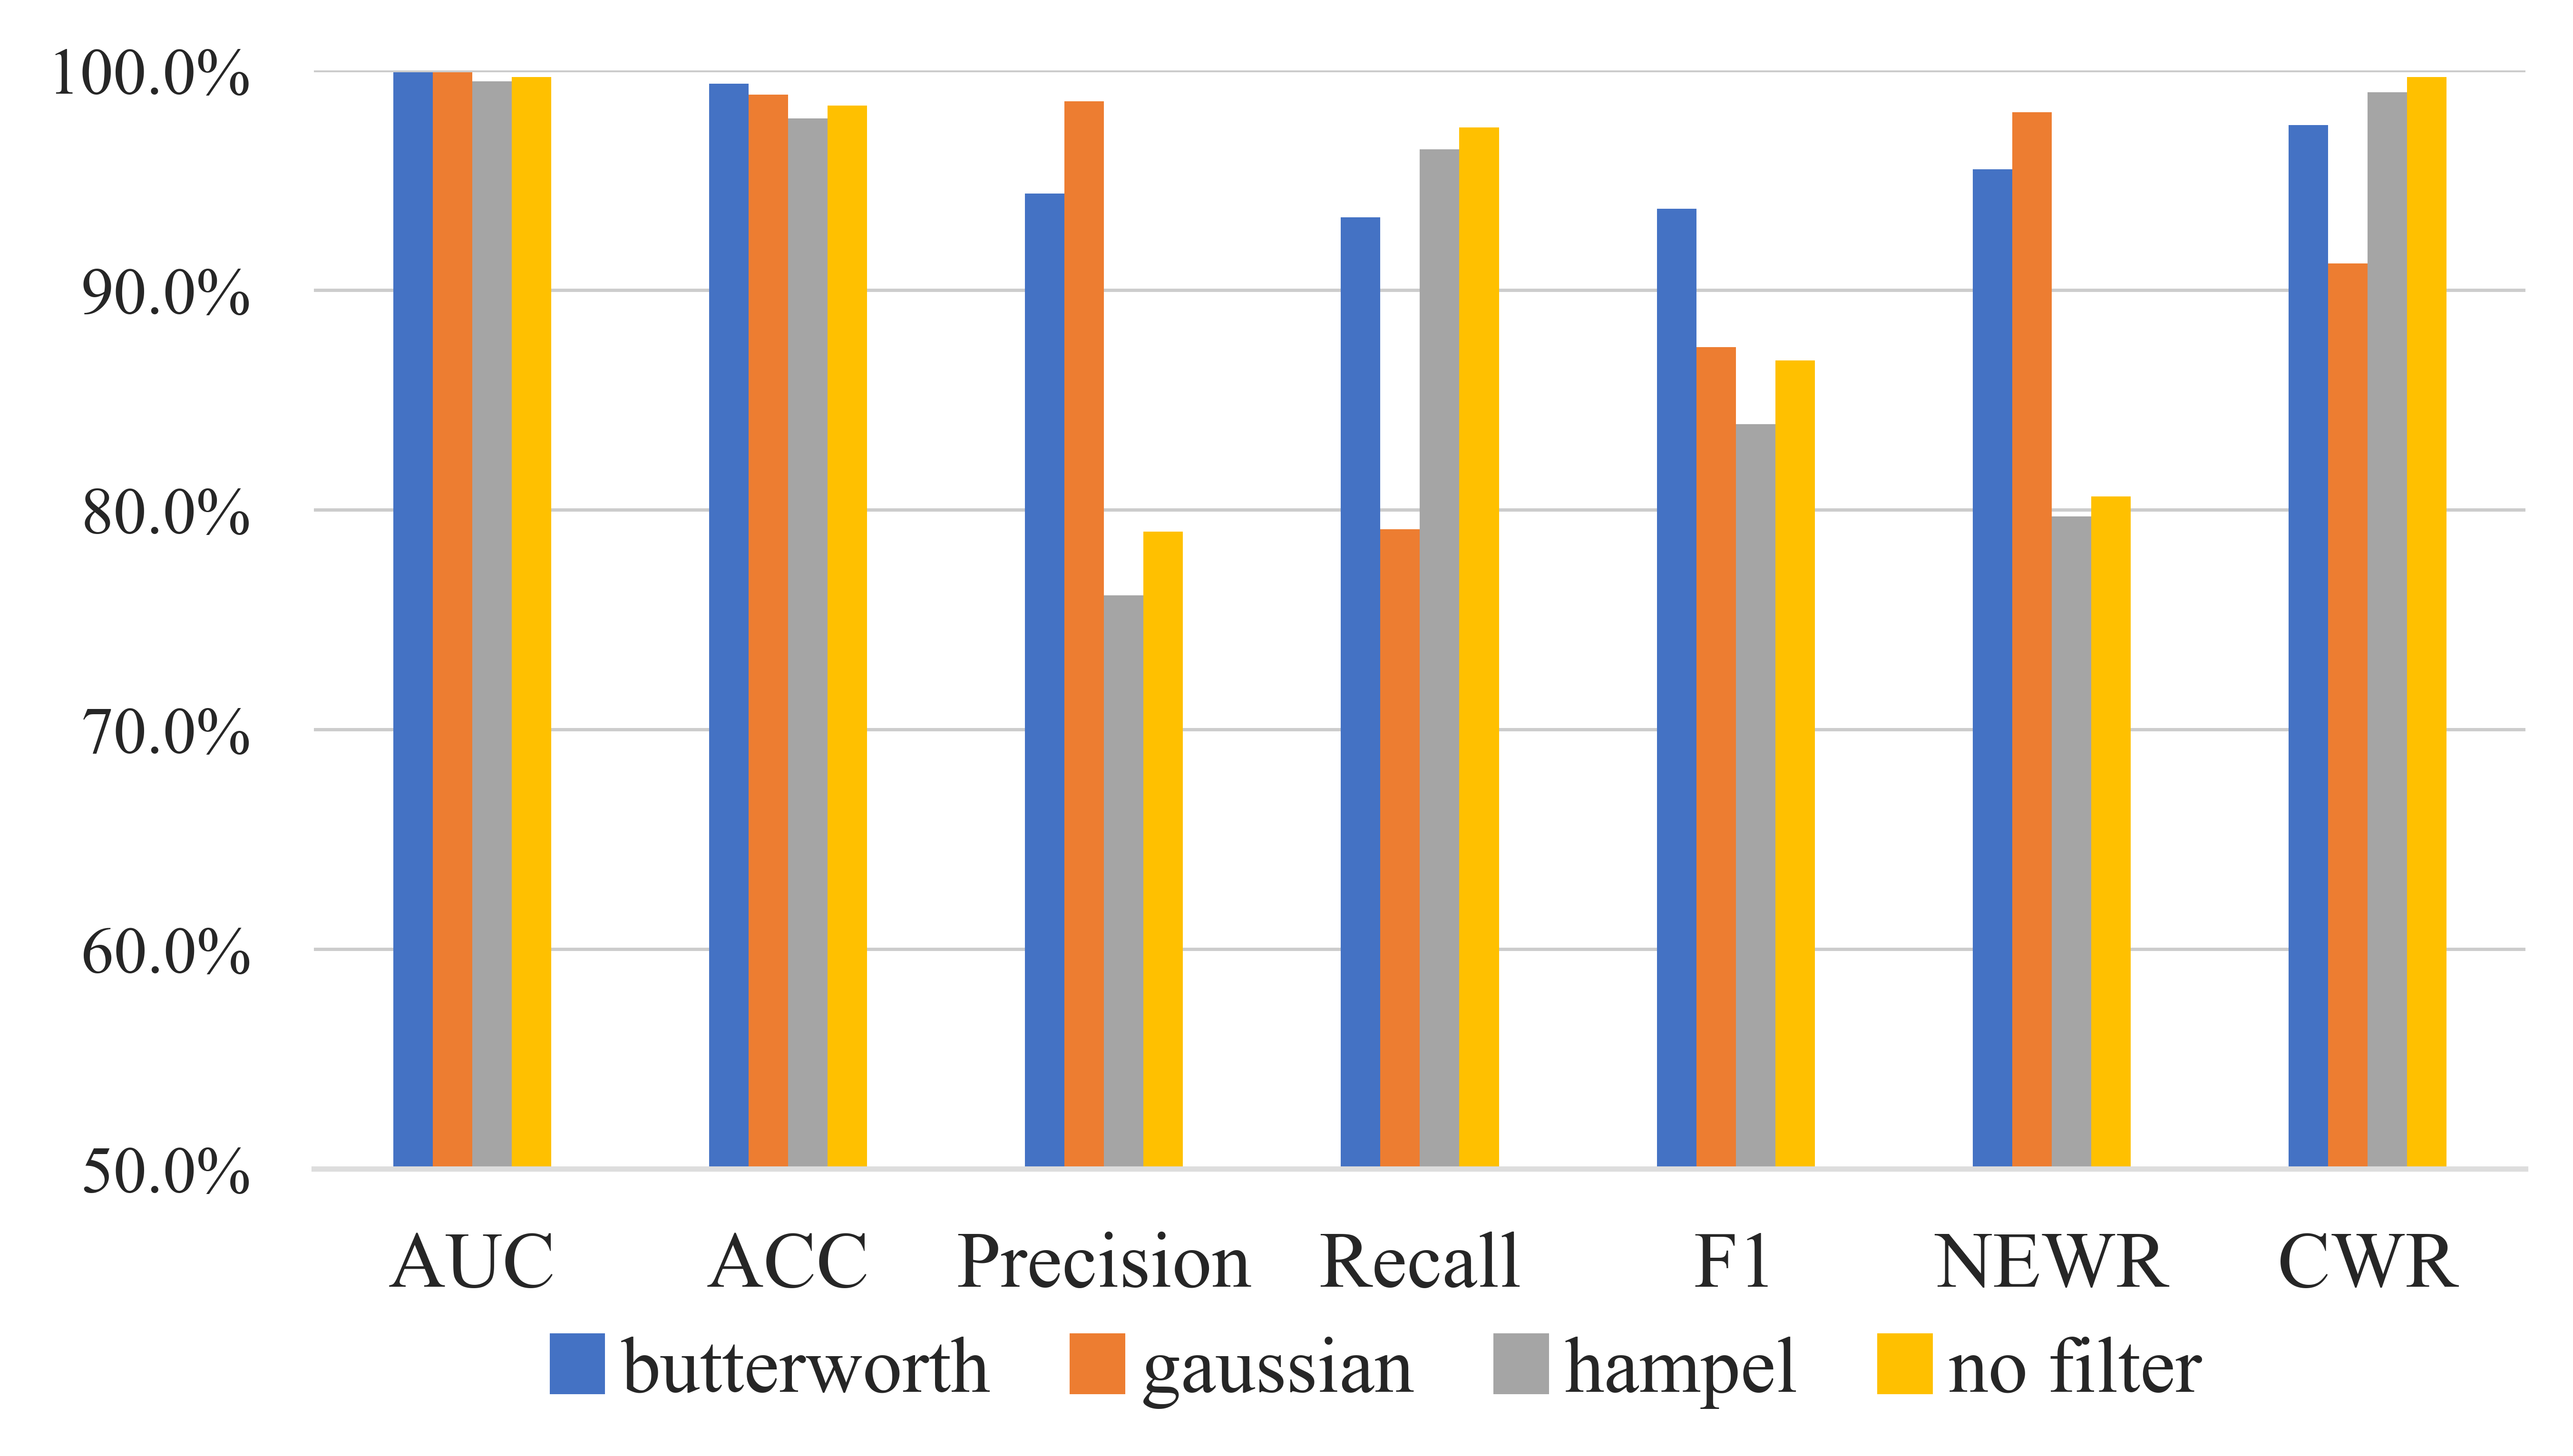

In [11]:
train_num=2
res4=result_grouped[(result_grouped["preprocess"]=="cv20") & (result_grouped["train_num"]==train_num)&result_grouped["filter"].isin(['none','gaussian','hampel','butterworth0.2'])].copy()
res4.index=['butterworth','gaussian','hampel','no filter']
display(res4)
show_fig(res4,ncol=4)

## Comparison of different cut-off frequencies

,count,preprocess,model,filter,train_num,epoch,group,auc,accuracy,precision,sensitivity,specificity,f1,sample,misinformation,missing_group,misinformation_group,test_num,NEWR,CWR
50Hz,10,cv20,CNN,butterworth0.1,18,100,24,0.999,0.998,0.999,0.966,1.000,0.982,3481.1,0.1,0.5,0.1,2.0,0.996,0.979
100Hz,10,cv20,CNN,butterworth0.2,18,100,24,0.999,0.999,0.997,0.988,1.000,0.993,3481.1,0.0,0.0,0.0,2.0,1.000,1.000
150Hz,10,cv20,CNN,butterworth0.3,18,100,24,0.999,0.999,0.999,0.988,1.000,0.993,3481.1,0.0,0.1,0.0,2.0,1.000,0.996
no filter,10,cv20,CNN,none,18,100,24,1.000,0.999,0.989,0.996,0.999,0.992,3481.1,2.4,0.0,0.3,2.0,0.988,1.000


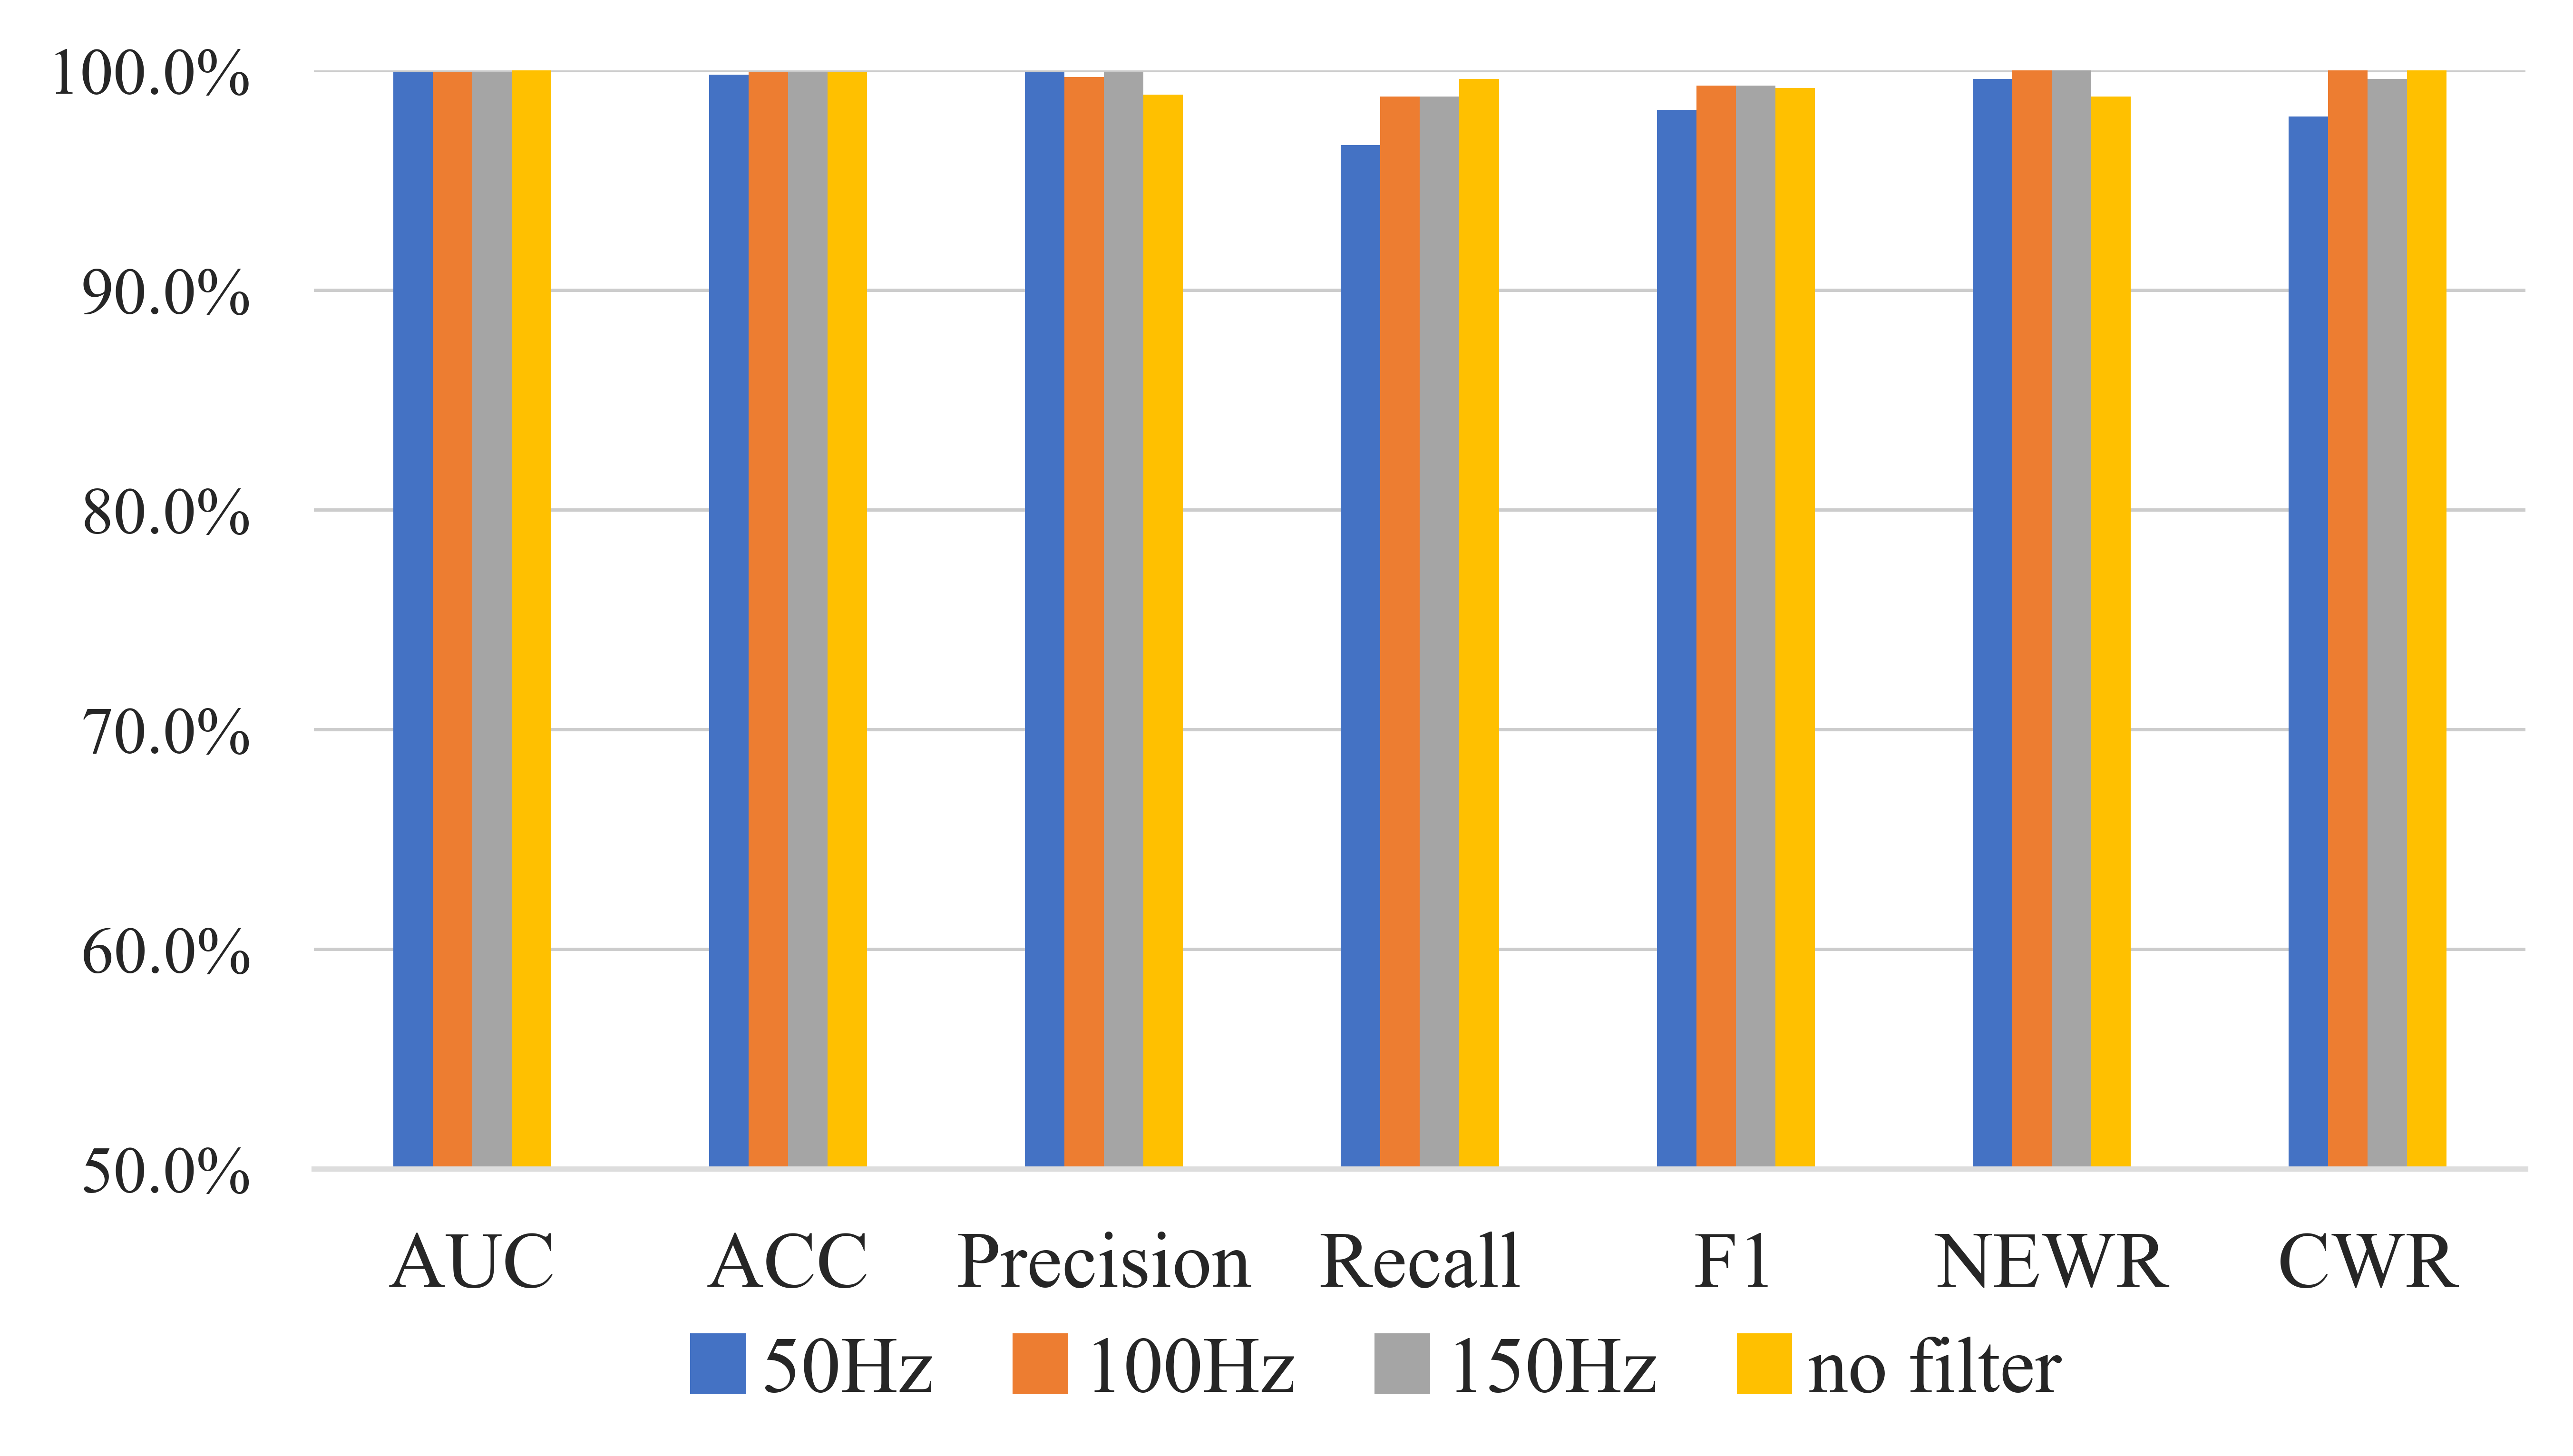

In [216]:
train_num=18
res5=result_grouped[(result_grouped["preprocess"]=="cv20") & (result_grouped["train_num"]==train_num)&result_grouped["filter"].isin(['butterworth0.1','butterworth0.2','butterworth0.3','none'])].copy()
res5.index=['50Hz','100Hz','150Hz','no filter']
display(res5)
show_fig(res5,ncol=4)

## Comparison of differnt N of CV

,count,preprocess,model,filter,train_num,epoch,group,auc,accuracy,precision,...,specificity,f1,sample,misinformation,missing_group,misinformation_group,test_num,NEWR,CWR,sort
N=5,10,cv5,CNN,butterworth0.2,2,100,216,0.995,0.986,0.838,...,0.989,0.880,31329.9,311.3,7.3,32.4,18.0,0.850,0.966,0
N=10,10,cv10,CNN,butterworth0.2,2,100,216,0.998,0.993,0.915,...,0.995,0.939,31329.9,116.9,2.6,20.0,18.0,0.907,0.988,1
N=20,10,cv20,CNN,butterworth0.2,2,100,216,0.999,0.994,0.944,...,0.997,0.937,31329.9,51.9,5.4,9.8,18.0,0.955,0.975,2
N=40,10,cv40,CNN,butterworth0.2,2,100,216,0.999,0.992,0.967,...,0.998,0.913,31329.9,39.5,10.4,9.2,18.0,0.957,0.952,3


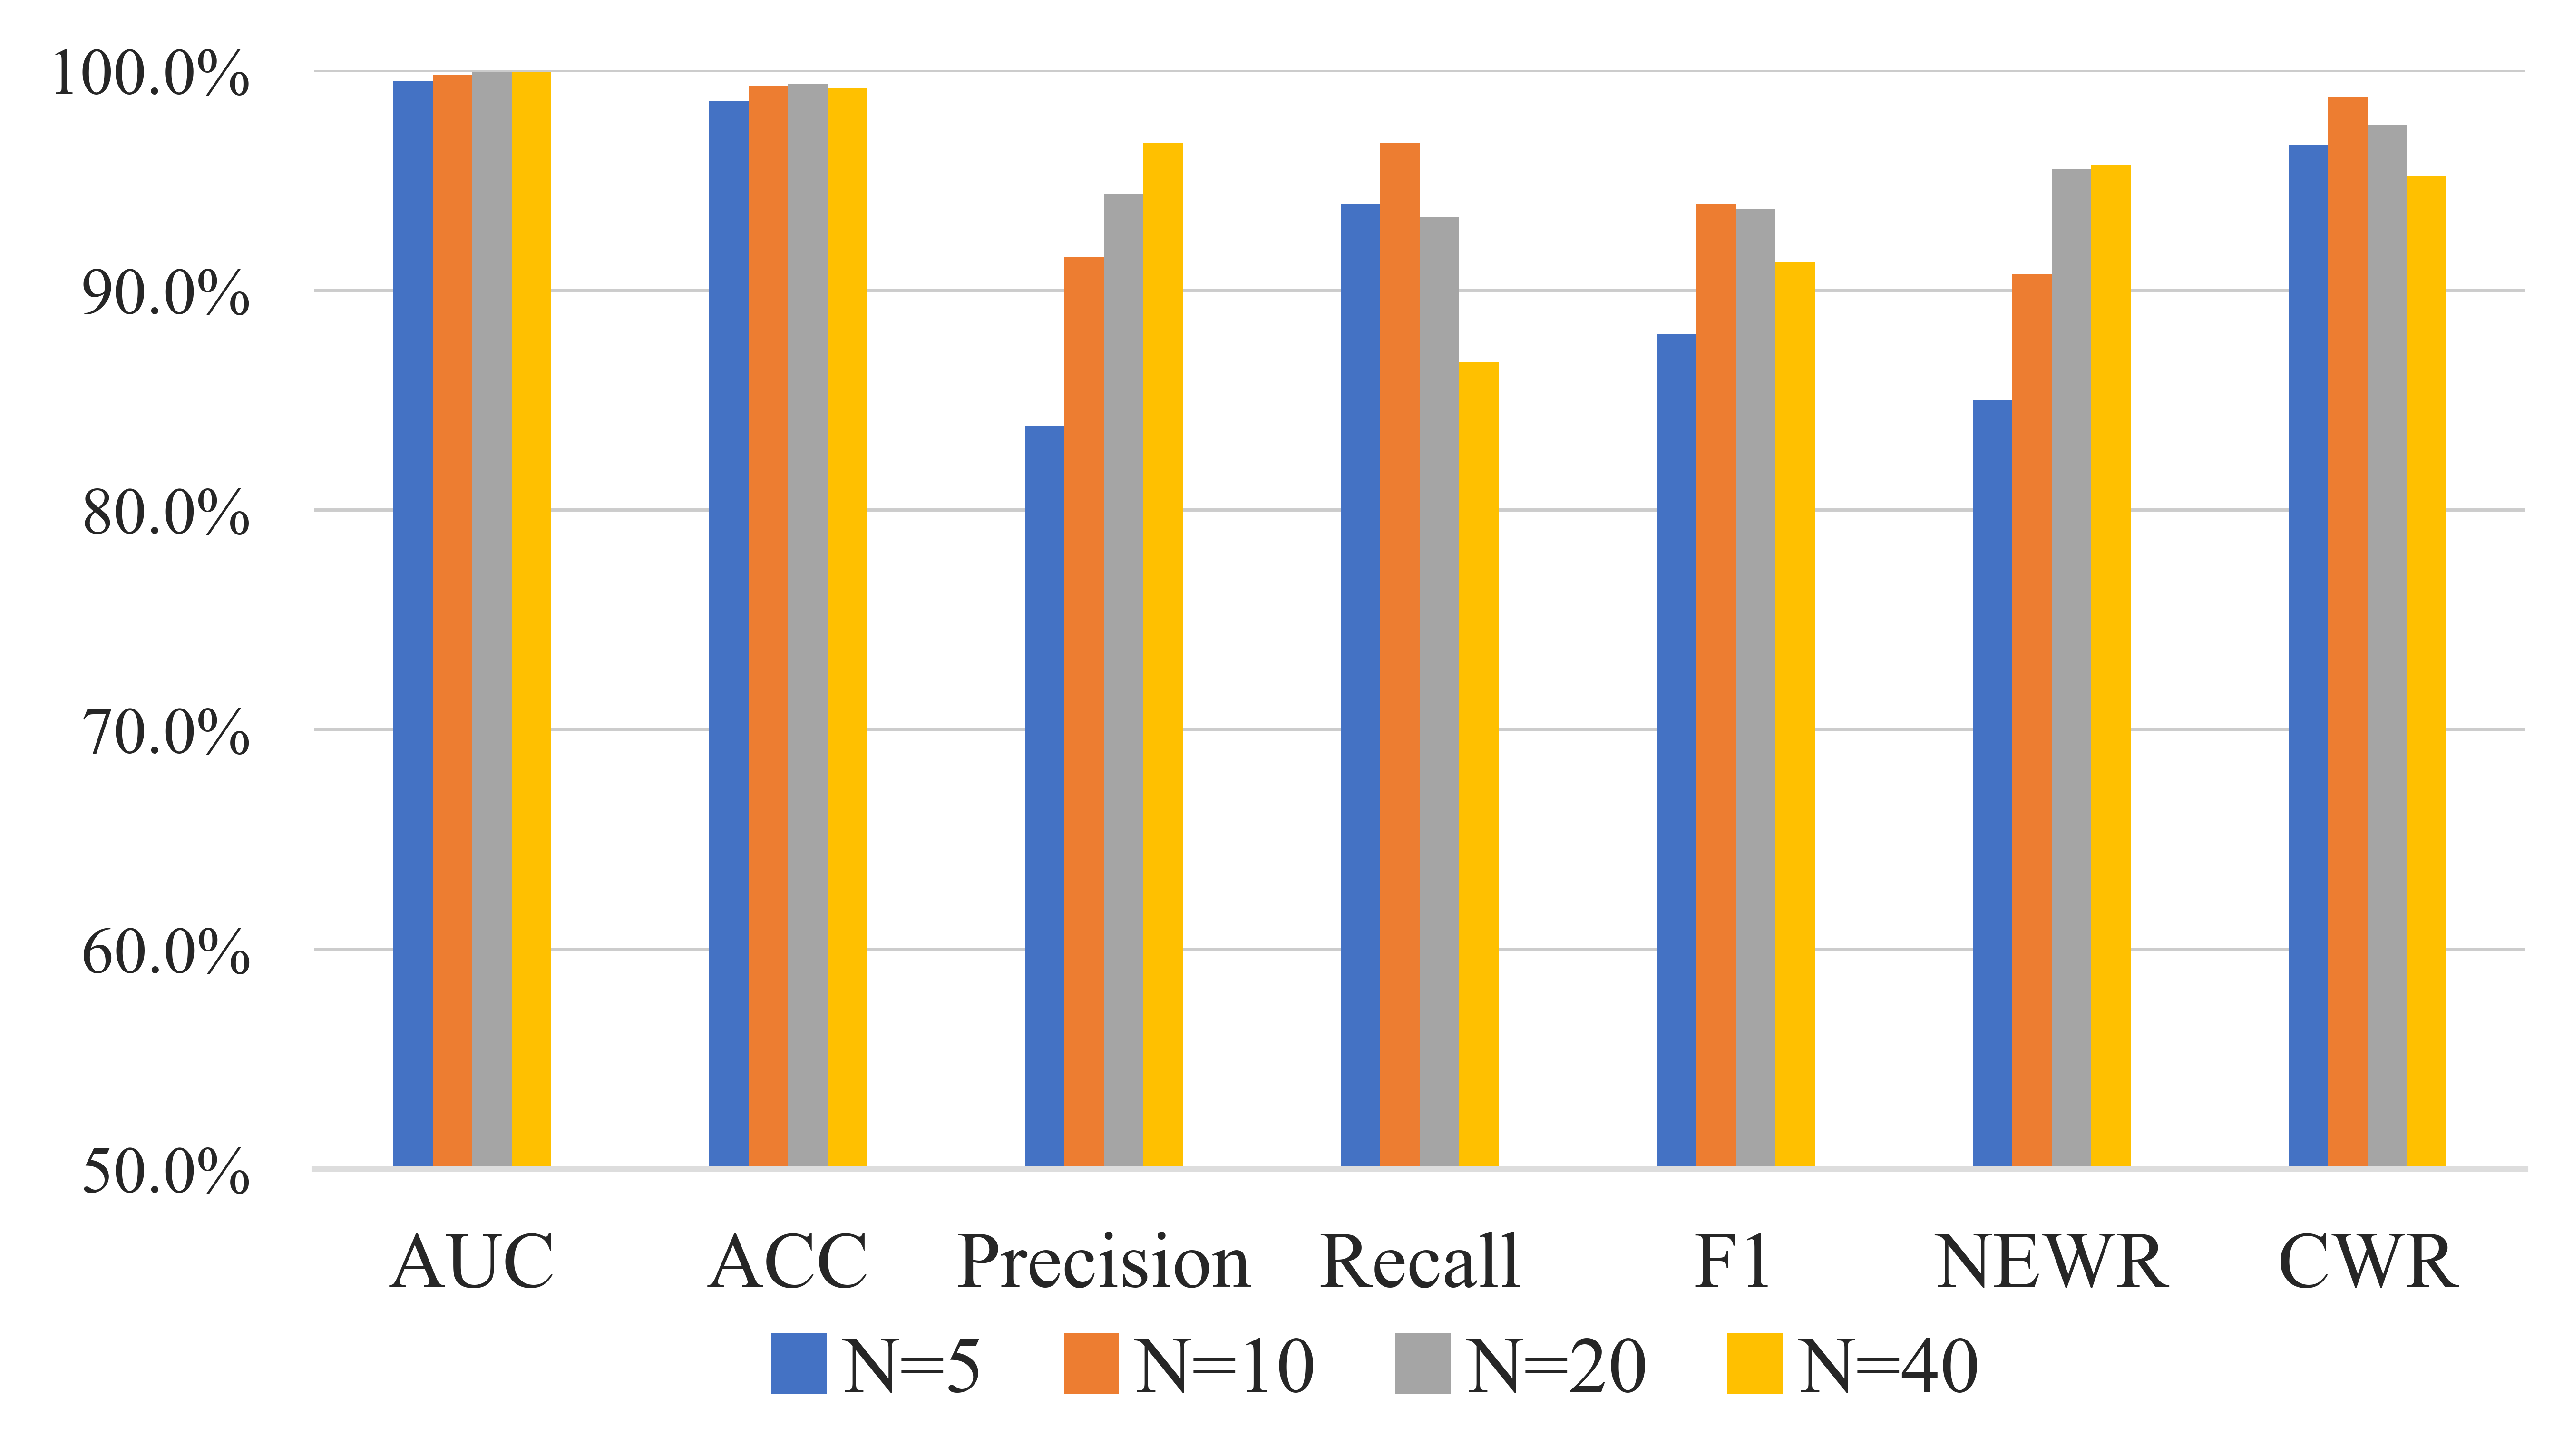

In [219]:
train_num=2
res5=result_grouped[(result_grouped["preprocess"].isin(['cv5','cv10','cv20','cv40'])) & (result_grouped["train_num"]==train_num) &(result_grouped["filter"]=="butterworth0.2")].copy()
res5["sort"]=[1,2,3,0]
res5.sort_values('sort', inplace=True)
res5.index=['N=5','N=10','N=20','N=40']
display(res5)
show_fig(res5,ncol=4)